# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

**This Data is representative of 17 campaigns that took place between May 2008 and November 2010, totaling 79354 contacts (41118 people).**

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [190]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [191]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [192]:
df = pd.read_csv('/Users/neelbardhan/Downloads/module17_starter/data/bank-additional-full.csv', sep = ';')
df_short = pd.read_csv('/Users/neelbardhan/Downloads/module17_starter/data/bank-additional.csv', sep = ';')

In [193]:
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



Text(0, 0.5, 'Count')

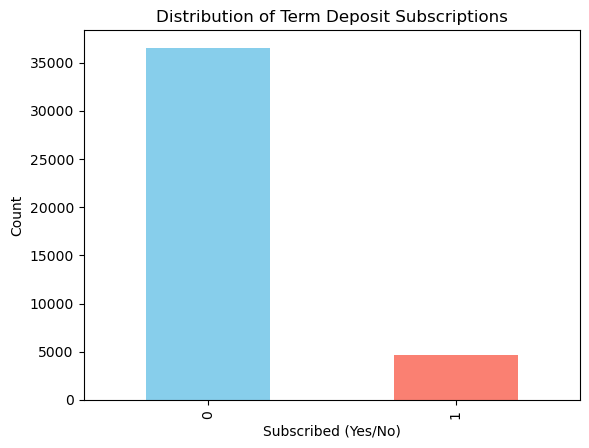

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Term Deposit Subscriptions")
plt.xlabel("Subscribed (Yes/No)")
plt.ylabel("Count")

Text(0, 0.5, 'Frequency')

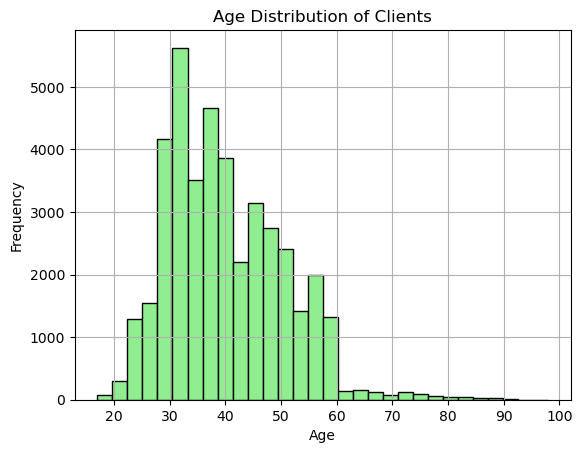

In [267]:
df['age'].hist(bins=30, color='lightgreen', edgecolor='black')
plt.title("Age Distribution of Clients")
plt.xlabel("Age")
plt.ylabel("Frequency")

Text(0.5, 1.0, 'Distribution of Job Types')

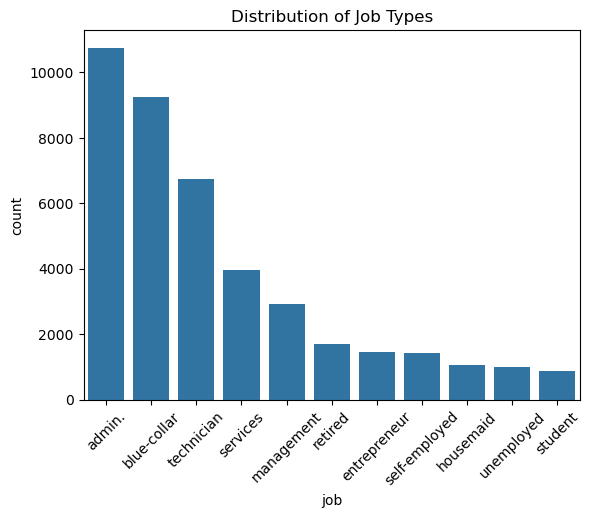

In [268]:
sns.countplot(x='job', data=df, order=df['job'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Job Types")

Don't really need this. Just cool to look at.

In [194]:
df.isnull().sum()

##no missing values, but we need to factor in the 'unknown' values

(df == 'unknown').sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [195]:
import numpy as np

# Columns where 'unknown' appears
cols_with_unknown = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Replace 'unknown' with the mode of the column
for col in cols_with_unknown:
    mode_val = df[col].mode()[0]
    df[col] = df[col].replace('unknown', mode_val)

In [196]:
# Convert categorical columns to 'category' dtype for efficiency
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                    'contact', 'month', 'day_of_week', 'poutcome']
df[categorical_cols] = df[categorical_cols].astype('category')

In [198]:
##check to see if the unknown values were replaced correctly
(df == 'unknown').sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [200]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [201]:
##understanding the rest of the data and its possible outcomes
exclude_cols = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']

for col in df.columns:
    if col not in exclude_cols:
        print(f"Column: {col}")
        print(df[col].unique())
        print("-" * 40)

Column: month
['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']
Categories (10, object): ['apr', 'aug', 'dec', 'jul', ..., 'may', 'nov', 'oct', 'sep']
----------------------------------------
Column: day_of_week
['mon', 'tue', 'wed', 'thu', 'fri']
Categories (5, object): ['fri', 'mon', 'thu', 'tue', 'wed']
----------------------------------------
Column: duration
[ 261  149  226 ... 1246 1556 1868]
----------------------------------------
Column: campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
----------------------------------------
Column: pdays
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
----------------------------------------
Column: previous
[0 1 2 3 4 5 6 7]
----------------------------------------
Column: poutcome
['nonexistent', 'failure', 'success']
Categories (3, object): ['failure', 'nonexistent', '

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**The objective of this project is to develop a predictive model that accurately identifies which bank clients are most likely to subscribe to a term deposit based on their demographic, social, and campaign-related information. By leveraging historical campaign data, the bank aims to optimize marketing efforts, improve campaign efficiency, and target potential customers more effectively, thereby increasing subscription rates while reducing costs associated with contacting unlikely prospects. Below is a rough roadmap of how we're going to do so.**

Step 1: Understand the business problem

	•	Goal: Predict whether a client will subscribe to a term deposit (y = yes/no) based on past campaign, demographic, and socio-economic data.

	•	Outcome: Enable the bank to target likely subscribers, reduce wasted marketing effort, and increase ROI on campaigns.

⸻

Step 2: Load and inspect the data

	•	Load the CSV into a pandas DataFrame.

	•	Explore basic properties:

	•	df.head(), df.info(), df.describe()

	•	Count missing values: df.isnull().sum(), (df=='unknown').sum()

	•	Examine unique values for categorical variables to spot irregularities.

⸻

Step 3: Data cleaning and preprocessing

	•	Replace 'unknown' values with the mode of each column (since they are considered noise).

	•	Drop or ignore duration for realistic predictive modeling (it leaks post-call info).

	•	Convert
	•		Categorical columns → category dtype
	•		Target y → binary integer (0 = no, 1 = yes)
	•		Optional: handle highly skewed numeric features if needed (e.g., pdays, campaign).

⸻

Step 4: Feature encoding

	•	Encode categorical variables to numeric for modeling:

	•	One-hot encoding for nominal categories (job, marital, education, contact, month, day_of_week, poutcome)

	•	Label encoding can work for binary categorical variables (default, housing, loan)

	•	Ensure all features are numeric for kNN and SVM.

Step 5: Train-test split

	•	Separate features (X) and target (y).

	•	Split into training and testing sets (e.g., 80/20 split):

Step 6: Model selection

	•	Define and fit four classifiers:

	1.	k-Nearest Neighbors (kNN): Tune n_neighbors, weights, and p using GridSearchCV.

	2.	Logistic Regression: Include regularization (C parameter tuning).

	3.	Decision Tree: Tune max_depth, min_samples_split, criterion.

	4.	Support Vector Machine (SVM): Tune kernel type, C, and gamma if using RBF kernel. Use Pipeline to include preprocessing and modeling for clean workflow.

⸻

Step 7: Model evaluation

	•	Evaluate models on test set:

	•	Metrics: accuracy, precision, recall, f1-score, possibly ROC-AUC

	•	Use confusion matrices to understand class-wise performance

	•	Use GridSearchCV for hyperparameter tuning:

	•	Inspect cv_results_ for performance across folds.

	•	Compute number of models evaluated as: number of parameter combinations × number of CV folds.

⸻

Step 8: Compare models

	•	Create a table summarizing:

	•	Model type

	•	Best hyperparameters

	•	Test metrics (accuracy, F1, etc.)

	•	Visualize performance with bar plots or heatmaps.

⸻

Step 9: Actionable insights

	•	Identify features most predictive of subscription (e.g., via decision tree feature importance, logistic regression coefficients).

	•	Recommend which segments of clients the bank should target for higher conversion rates.

	•	Discuss limitations (class imbalance, unrealistic features like duration).

⸻

Step 10: Recommendations / Next steps

	•	Suggest ways to improve future campaigns:

	•	Incorporate more recent campaigns

	•	Collect additional client behavioral data
	
	•	Explore ensemble models (Random Forest, Gradient Boosting) for better accuracy

In [202]:
##X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Task Suggested Libraries / Classes

Data loading: pandas

Data cleaning: pandas, numpy

Encoding: pandas.get_dummies(), sklearn.preprocessing.OneHotEncoder, LabelEncoder

Train-test split: sklearn.model_selection.train_test_split

Modeling: sklearn.neighbors.KNeighborsClassifier, LogisticRegression, DecisionTreeClassifier, SVC

Pipelines: sklearn.pipeline.Pipeline

Hyperparameter tuning: sklearn.model_selection.GridSearchCV

Metrics: sklearn.metrics.accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Visualization: matplotlib, seaborn

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [203]:
X = df.drop('y', axis=1)
y = df['y']

In [204]:
y = y.map({'yes': 1, 'no': 0})

In [216]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [237]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [206]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [207]:
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [208]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [ ]:
# X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [ ]:
# X_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False


In [230]:
# X_encoded.dtypes.value_counts()

In [229]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'
)

X_encoded = encoder.fit_transform(X)

This part sets up a ColumnTransformer, which allows us to selectively transform certain columns in our dataset. Here, we apply OneHotEncoder to all categorical columns (cat_cols), which converts each category into a set of numeric columns (one-hot encoding).

handle_unknown='ignore' ensures that if a new category appears in the test set, it won’t cause an error.

remainder='passthrough' leaves all numeric columns untouched, so they are included in the output.

fit_transform(X) both learns the encoding from the dataset and applies it, producing a fully numeric feature matrix. First, the encoder must learn what categories exist (fit) - then, it must actually encode the data (transform)

In [232]:
ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_cat_encoded = ohe.fit_transform(X[cat_cols])

# Convert to DataFrame for convenience and attach column names
X_cat_encoded = pd.DataFrame(X_cat_encoded, columns=ohe.get_feature_names_out(cat_cols), index=X.index)

# Concatenate numeric columns
X = pd.concat([X[num_cols], X_cat_encoded], axis=1)

Here, we encode categorical columns again separately, but this time we convert them into a Pandas DataFrame for convenience.
    
drop='first' avoids the dummy variable trap by dropping the first category of each column (optional depending on the model).
    
sparse_output=False ensures the output is a dense array so it can easily be converted to a DataFrame.
    
get_feature_names_out(cat_cols) generates meaningful column names like job_admin, education_university.degree, etc., which helps with interpretability.

In [235]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [210]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),  # avoid mean-centering for sparse matrices
    ('classifier', LogisticRegression())
])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [239]:
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),        # scales numeric features
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Fit the model
knn_pipe.fit(X_train, y_train)

# Evaluate
accuracy = knn_pipe.score(X_test, y_test)
print("Test accuracy:", accuracy)

Test accuracy: 0.8983976693372178


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [242]:
y.value_counts(normalize=True)

y
0    0.887346
1    0.112654
Name: proportion, dtype: float64

In [243]:
# Majority class
majority_class = y.mode()[0]

# Baseline accuracy
baseline_accuracy = (y == majority_class).mean()
print("Baseline accuracy:", baseline_accuracy)

Baseline accuracy: 0.8873458288821987


The baseline sets a floor performance. It tells you: “If my model can’t beat this simple strategy, it’s not actually learning anything useful.” In other words, it’s a sanity check before investing in complex modeling.

**Why majority-class accuracy works?**

In a binary classification problem, a simple naive strategy is: always predict the most common class. If 88% of customers say no, then guessing no all the time gives you 88% correct. Any real model must do better than 88% to show it’s capturing patterns in the data rather than just reflecting class imbalance.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logreg_pipe = Pipeline([
    ('scaler', StandardScaler()),               # scale features
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))  # logistic regression
])

In [246]:
logreg_pipe.fit(X_train, y_train)

accuracy = logreg_pipe.score(X_test, y_test)
print("Test accuracy:", accuracy)

Test accuracy: 0.9099295945617868


This at least beats the baseline model, so we know it's at least a useful analysis. 90.99% prediction accuracy isn't anything to scoff at.

In [248]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = logreg_pipe.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7097  206]
 [ 536  399]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.66      0.43      0.52       935

    accuracy                           0.91      8238
   macro avg       0.79      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



### Problem 9: Score the Model

What is the accuracy of your model?

**The logistic regression model achieved an accuracy of 90.99% on the test set, which exceeds the naive baseline of 88.73%, demonstrating that the model captures patterns in the customer features that predict term deposit subscriptions.**


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time

In [250]:
models = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsClassifier())
    ]),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVC())
    ])
}

In [251]:
results = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    train_time = end_time - start_time
    
    results.append({
        'Model': name,
        'Train Time (s)': round(train_time, 3),
        'Train Accuracy': round(train_acc, 4),
        'Test Accuracy': round(test_acc, 4)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic Regression,0.573,0.9117,0.9099
1,KNN,0.016,0.9219,0.8984
2,Decision Tree,0.151,1.0000,0.8881
3,SVM,8.747,0.9256,0.9077


Observation:

	•	Decision Tree overfits. Perfect train accuracy but lower test accuracy.
	•	KNN is slightly overfitting, but very fast.
	•	SVM is strong but slow.
	•	Logistic Regression is fast, simple, and generalizes well — a strong baseline.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [252]:
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'knn__n_neighbors': range(1, 21),
    'knn__weights': ['uniform', 'distance']
}

knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

grid_knn = GridSearchCV(knn_pipe, param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train, y_train)

print("Best KNN params:", grid_knn.best_params_)
print("Best KNN F1-score:", grid_knn.best_score_)

Best KNN params: {'knn__n_neighbors': 5, 'knn__weights': 'distance'}
Best KNN F1-score: 0.42387786330380245


In [253]:
param_grid_tree = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),
                         param_grid_tree, cv=5, scoring='f1', n_jobs=-1)
grid_tree.fit(X_train, y_train)

print("Best Decision Tree params:", grid_tree.best_params_)
print("Best Decision Tree F1-score:", grid_tree.best_score_)

Best Decision Tree params: {'max_depth': 3, 'min_samples_split': 2}
Best Decision Tree F1-score: 0.5867104296355382


In [257]:
param_grid_logreg = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l2']
}

logreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

grid_logreg = GridSearchCV(logreg_pipe, param_grid_logreg, cv=5, scoring='f1', n_jobs=-1)
grid_logreg.fit(X_train, y_train)

print("Best Logistic Regression params:", grid_logreg.best_params_)
print("Best Logistic Regression F1-score:", grid_logreg.best_score_)

Best Logistic Regression params: {'model__C': 10, 'model__penalty': 'l2'}
Best Logistic Regression F1-score: 0.512653891899101


In [258]:
param_grid_svm = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf', 'poly']
}

svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC())
])

grid_svm = GridSearchCV(svm_pipe, param_grid_svm, cv=5, scoring='f1', n_jobs=-1)
grid_svm.fit(X_train, y_train)

print("Best SVM params:", grid_svm.best_params_)
print("Best SVM F1-score:", grid_svm.best_score_)

Best SVM params: {'model__C': 10, 'model__kernel': 'rbf'}
Best SVM F1-score: 0.5037661309866088


In [256]:
tuned_results = pd.DataFrame([
    {'Model': 'KNN', 'Best Params': grid_knn.best_params_, 'Best CV F1': grid_knn.best_score_},
    {'Model': 'Decision Tree', 'Best Params': grid_tree.best_params_, 'Best CV F1': grid_tree.best_score_},
    {'Model': 'Logistic Regression', 'Best Params': grid_logreg.best_params_, 'Best CV F1': grid_logreg.best_score_},
    {'Model': 'SVM', 'Best Params': grid_svm.best_params_, 'Best CV F1': grid_svm.best_score_}
])
tuned_results

,Model,Best Params,Best CV F1
0,KNN,"{'knn__n_neighbors': 5, 'knn__weights': 'dista...",0.423878
1,Decision Tree,"{'max_depth': 3, 'min_samples_split': 2}",0.586710
2,Logistic Regression,"{'model__C': 10, 'model__penalty': 'l2'}",0.512654
3,SVM,"{'model__C': 10, 'model__kernel': 'rbf'}",0.503766


The idea here is that you wanna balance precision and recall via measurement of F1 score as to account for false negatives/positives.

**What this means for the business**

Using F1 as the metric focuses on correctly identifying potential subscribers, rather than just overall accuracy.

Decision Tree is the most promising model for marketing targeting because it identifies more actual subscribers (higher recall), & avoids sending unnecessary offers to non-subscribers (maintains precision)

Logistic Regression is simpler, interpretable, and still reasonable, but may miss some subscribers.

KNN is less useful for this imbalanced dataset.

SVM is computationally heavier and slightly worse in F1 than Decision Tree.

After tuning, the Decision Tree achieved the highest cross-validated F1 score (0.587), meaning it is currently the best at balancing precision and recall for predicting term deposit subscriptions. Models like Logistic Regression and SVM perform moderately, while KNN struggles to capture enough positive cases. This highlights the importance of tuning models and using F1 as a metric when dealing with imbalanced marketing datasets — accuracy alone would not reveal these differences.

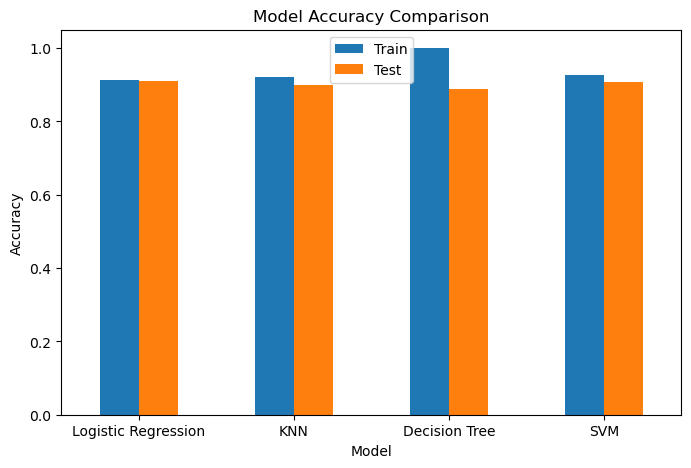

In [264]:
results_df.plot(x='Model', y=['Train Accuracy','Test Accuracy'], kind='bar', figsize=(8,5))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.legend(["Train", "Test"])

([0, 1, 2, 3],
 [Text(0, 0, 'KNN'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Logistic Regression'),
  Text(3, 0, 'SVM')])

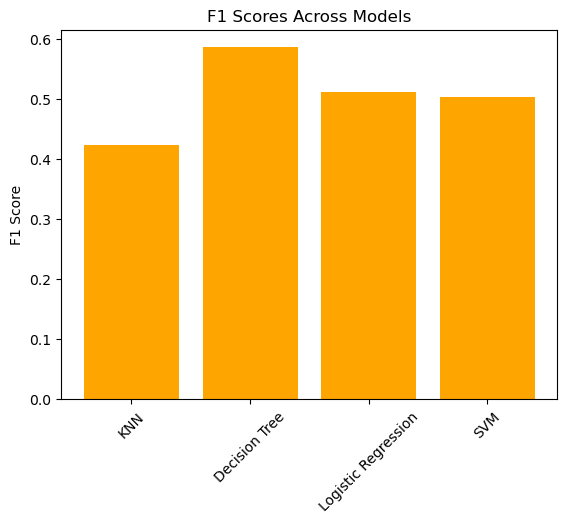

In [269]:
plt.bar(tuned_results['Model'], tuned_results['Best CV F1'], color='orange')
plt.title("F1 Scores Across Models")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)

##### Questions